<a href="https://colab.research.google.com/github/sightes/RNA-UBO-2023/blob/main/ejemplo_sabado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

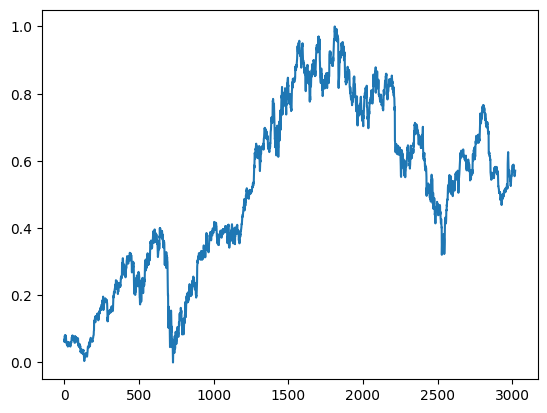

In [1]:
url='https://raw.githubusercontent.com/sightes/RNA-UBO-2023/main/IBM_2006-01-01_to_2018-01-01.csv'
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
dataset=pd.read_csv(url)
dataset.head(5)
training_set=dataset.iloc[:,1:2].values
sc=MinMaxScaler(feature_range=(0,1))
train_set_sc=sc.fit_transform(training_set)
X_train=[]
y_train=[]
for i in range(60,1200):
  X_train.append(train_set_sc[i-60:i,0])
  y_train.append(train_set_sc[i,0])
X_train,y_train=np.asarray(X_train),np.asarray(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1]))
plt.plot(train_set_sc[:,0])

In [38]:
y_train

array([0.07108805, 0.0715788 , 0.06996635, ..., 0.44475603, 0.44966349,
       0.45695457])

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM,Input,GRU
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
def red_MLP(optimizer):
  regresor=Sequential()
  regresor.add(Input(shape=(X_train.shape[1],1)))
  regresor.add(Dense(units=24))
  regresor.add(Dense(units=12))
  regresor.add(Dense(units=1))
  regresor.compile(optimizer=optimizer,loss='mean_squared_error')
  return regresor
def red_LSTM(optimizer):
  regresor=Sequential()
  regresor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
  regresor.add(Dropout(0.2))
  regresor.add(LSTM(units=50,return_sequences=True))
  regresor.add(Dropout(0.2))
  regresor.add(LSTM(units=50,return_sequences=True))
  regresor.add(Dropout(0.2))
  regresor.add(LSTM(units=50))
  regresor.add(Dropout(0.2))
  regresor.add(Dense(units=1))
  regresor.compile(optimizer=optimizer,loss='mean_squared_error')
  return regresor
def red_GRU(optimizer):
  regresor=Sequential()
  regresor.add(GRU(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
  regresor.add(Dropout(0.2))
  regresor.add(GRU(units=50))
  regresor.add(Dropout(0.2))
  regresor.add(Dense(units=1))
  regresor.compile(optimizer=optimizer,loss='mean_squared_error')
  return regresor

regresor= KerasRegressor(build_fn=red_LSTM)
parameters={'epochs':[100] , 'optimizer':['adam']}
grid_search=GridSearchCV(estimator=regresor,param_grid=parameters, scoring='neg_mean_squared_error',cv=2)
grid_search.fit(X_train,y_train)

<ipython-input-48-6616d6be824f>:36: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regresor= KerasRegressor(build_fn=red_LSTM)


Epoch 1/100
18/18 [==============================] - 8s 17ms/step - loss: 0.0198
Epoch 2/100
18/18 [==============================] - 0s 14ms/step - loss: 0.0054
Epoch 3/100
18/18 [==============================] - 0s 14ms/step - loss: 0.0034
Epoch 4/100
18/18 [==============================] - 0s 14ms/step - loss: 0.0030
Epoch 5/100
18/18 [==============================] - 0s 13ms/step - loss: 0.0026
Epoch 6/100
18/18 [==============================] - 0s 15ms/step - loss: 0.0025
Epoch 7/100
18/18 [==============================] - 0s 13ms/step - loss: 0.0026
Epoch 8/100
18/18 [==============================] - 0s 14ms/step - loss: 0.0024
Epoch 9/100
18/18 [==============================] - 0s 15ms/step - loss: 0.0020
Epoch 10/100
18/18 [==============================] - 0s 14ms/step - loss: 0.0021
Epoch 11/100
18/18 [==============================] - 0s 14ms/step - loss: 0.0021
Epoch 12/100
18/18 [==============================] - 0s 14ms/step - loss: 0.0024
Epoch 13/100
18/18 [=====

GridSearchCV(cv=2,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7b7169fdb4f0>,
             param_grid={'epochs': [100], 'optimizer': ['adam']},
             scoring='neg_mean_squared_error')

In [49]:
X_test=[]
y_test=[]
for i in range(1300,3020):
  X_test.append(train_set_sc[i-60:i,0])
  y_test.append(train_set_sc[i,0])
X_test=np.asarray(X_test)
y_test=np.asarray(y_test)

y_pred=mejor_regresor.predict(X_train.reshape(-1,1))

2138/2138 [==============================] - 5s 2ms/step


In [50]:
y_pred.reshape(1,-1)

array([[0.25155234, 0.25147262, 0.25121757, ..., 0.26837906, 0.26868194,
        0.2689051 ]], dtype=float32)

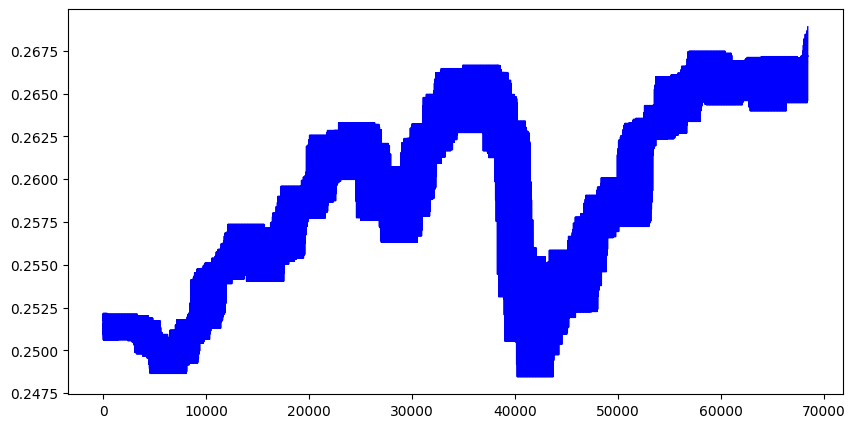

In [47]:
plt.figure(figsize=(10,5))

plt.plot(y_pred,color='blue', linewidth = 1)

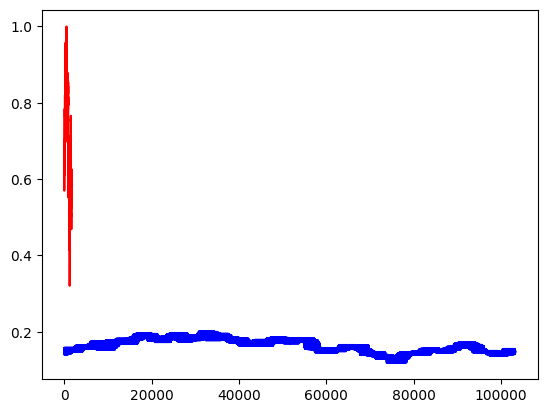

In [55]:
plt.plot(y_test,color='red')
plt.plot(y_pred,color='blue')
plt.show()